In [1]:
from keras import layers
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, roc_auc_score
from tensorflow.python.client import device_lib
from keras.preprocessing.image import ImageDataGenerator

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13517410482255845519
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2247832372
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2287051268993112797
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
width, height = 150, 150
batch_size=64

dir_alldata = Path('chest_xray/chest_xray')
train_data_dir = dir_alldata / 'train'
validation_data_dir = dir_alldata / 'val'
test_data_dir = dir_alldata / 'test'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(train_data_dir, target_size =(width, height),batch_size=batch_size, class_mode="binary" )
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size = (width, height),batch_size=batch_size, class_mode="binary")
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size = (width, height),batch_size=batch_size, class_mode="binary", shuffle=False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(x=train_generator,
                    steps_per_epoch=train_generator.n//batch_size,
                    epochs=25,
                    validation_data=validation_generator
                    )

Epoch 1/25
81/81 [==============================] - 77s 903ms/step - loss: 0.5022 - accuracy: 0.7271 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 2/25
81/81 [==============================] - 78s 959ms/step - loss: 0.3440 - accuracy: 0.8502 - val_loss: 0.7091 - val_accuracy: 0.6250
Epoch 3/25
81/81 [==============================] - 69s 844ms/step - loss: 0.2793 - accuracy: 0.8880 - val_loss: 1.1415 - val_accuracy: 0.6250
Epoch 4/25
81/81 [==============================] - 68s 838ms/step - loss: 0.2649 - accuracy: 0.8971 - val_loss: 0.7083 - val_accuracy: 0.7500
Epoch 5/25
81/81 [==============================] - 68s 833ms/step - loss: 0.2245 - accuracy: 0.9152 - val_loss: 1.2196 - val_accuracy: 0.5625
Epoch 6/25
81/81 [==============================] - 66s 816ms/step - loss: 0.2277 - accuracy: 0.9097 - val_loss: 0.8041 - val_accuracy: 0.7500
Epoch 7/25
81/81 [==============================] - 65s 806ms/step - loss: 0.1970 - accuracy: 0.9249 - val_loss: 0.6488 - val_accuracy: 0.6875

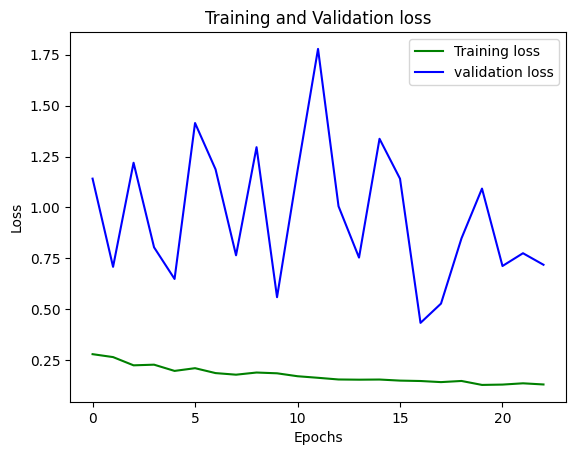

In [6]:
loss_train = history.history['loss'][2:]
loss_val = history.history['val_loss'][2:]
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

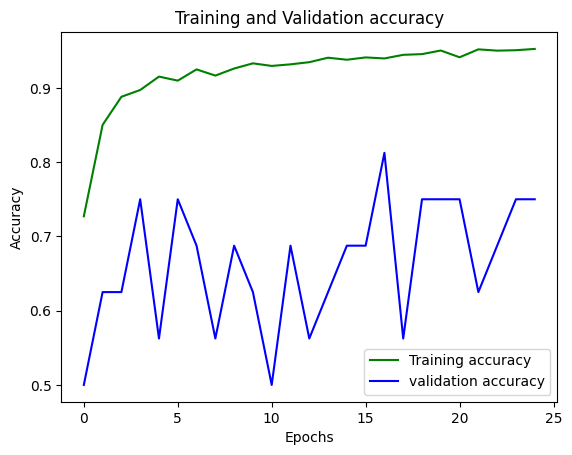

In [7]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
test_y=test_generator.labels
predictions = history.model.predict(test_generator)
predictions=predictions>0.85
print('Accuracy = ', accuracy_score(test_y, predictions))
print('F1 = ', f1_score(test_y, predictions))
print('AUC = ', roc_auc_score(test_y, predictions))
cm = confusion_matrix(test_y, predictions)
print('sens = ',cm[1, 1] / (cm[1, 0] + cm[1, 1]))
print('spec = ',cm[0, 0] / (cm[0, 0] + cm[0, 1]))
print('prec = ',precision_score(test_y, predictions))
confusion_matrix(test_y, predictions)

10/10 [==============================] - 5s 470ms/step
Accuracy =  0.9166666666666666
F1 =  0.9343434343434343
AUC =  0.905982905982906
sens =  0.9487179487179487
spec =  0.8632478632478633
prec =  0.9203980099502488


array([[202,  32],
       [ 20, 370]], dtype=int64)